<a href="https://colab.research.google.com/github/u1-byte/SmartRicePriceControl/blob/main/Machine%20Learning/Code/%5BKelembaban%5DML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#import library
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from google.colab import files
import csv
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [5]:
# Upload file dataset dari lokal
uploaded = files.upload()

Saving Cuaca.csv to Cuaca.csv


# **Kabupaten Lamongan / Jatim**

In [8]:
# Input data Lamongan / Jatim
input_kelembaban_ratarata = []
number_of_input = []
number=1

# Baca file.csv
with open('/content/Cuaca.csv') as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  next(csv_reader)
  for row in csv_reader:
    number_of_input.append(number)
    input_kelembaban_ratarata.append(float(row[2]))
    number+=1

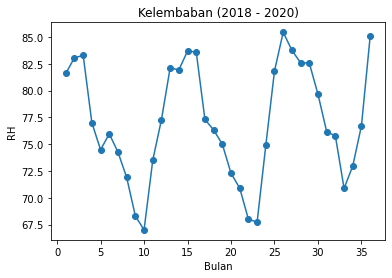

In [9]:
# Grafik garis dari Suhu
plt.plot(number_of_input,input_kelembaban_ratarata,marker='o')
plt.title('Kelembaban (2018 - 2020)')
plt.ylabel('RH')
plt.xlabel('Bulan')
plt.show()

In [10]:
# Input dari data pada database
dataset = []
counter=0

# Baca file.csv
with open('/content/Cuaca.csv') as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  next(csv_reader)
  for row in csv_reader:
    dataset.append([])
    dataset[counter].append(float(row[2]))
    counter+=1

dataset = np.array(dataset)

print(dataset)

[[81.61]
 [83.07]
 [83.29]
 [77.  ]
 [74.48]
 [75.97]
 [74.26]
 [71.9 ]
 [68.3 ]
 [67.  ]
 [73.5 ]
 [77.29]
 [82.13]
 [81.93]
 [83.7 ]
 [83.6 ]
 [77.31]
 [76.33]
 [75.  ]
 [72.29]
 [70.9 ]
 [68.  ]
 [67.73]
 [74.89]
 [81.84]
 [85.45]
 [83.77]
 [82.6 ]
 [82.58]
 [79.66]
 [76.17]
 [75.77]
 [70.88]
 [72.97]
 [76.73]
 [85.06]]


In [11]:
# Normalisasi dataset
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)

In [12]:
# Fungsi membuat sequence
def buat_sequences(dataset, window_size):
    input = []
    output = []

    for i in range(len(dataset)-window_size+1):
        window = dataset[i:(i+window_size-4), 0]
        input.append(window)
        output.append(dataset[(i+window_size-4):i+window_size, 0])
    return np.array(input),np.array(output)

window_size = 16
dataInput, dataOutput = buat_sequences(dataset, window_size)

print(len(dataInput))
print(len(dataOutput))

21
21


In [13]:
split_valid = 15
input_train, input_test = dataInput[:split_valid,:], dataInput[split_valid:,:]
output_train, output_test = dataOutput[:split_valid,:], dataOutput[split_valid:,:]

print(len(input_train))
print(len(output_train))

15
15


In [14]:
print(input_test)
print("------")
print(output_test)

[[0.899729   0.55880759 0.50569106 0.43360434 0.28672087 0.21138211
  0.05420054 0.0395664  0.42764228 0.80433604 1.         0.90894309]
 [0.55880759 0.50569106 0.43360434 0.28672087 0.21138211 0.05420054
  0.0395664  0.42764228 0.80433604 1.         0.90894309 0.84552846]
 [0.50569106 0.43360434 0.28672087 0.21138211 0.05420054 0.0395664
  0.42764228 0.80433604 1.         0.90894309 0.84552846 0.84444444]
 [0.43360434 0.28672087 0.21138211 0.05420054 0.0395664  0.42764228
  0.80433604 1.         0.90894309 0.84552846 0.84444444 0.68617886]
 [0.28672087 0.21138211 0.05420054 0.0395664  0.42764228 0.80433604
  1.         0.90894309 0.84552846 0.84444444 0.68617886 0.49701897]
 [0.21138211 0.05420054 0.0395664  0.42764228 0.80433604 1.
  0.90894309 0.84552846 0.84444444 0.68617886 0.49701897 0.47533875]]
------
[[0.84552846 0.84444444 0.68617886 0.49701897]
 [0.84444444 0.68617886 0.49701897 0.47533875]
 [0.68617886 0.49701897 0.47533875 0.2102981 ]
 [0.49701897 0.47533875 0.2102981  0.3

In [16]:
# Ubah dimensinya untuk disesuaikan dengan model
input_train = input_train.reshape((input_train.shape[0], 1, 1, 1, window_size-4))
input_test = input_test.reshape((input_test.shape[0], 1, 1, 1, window_size-4))

In [17]:
print(input_test)

[[[[[0.899729   0.55880759 0.50569106 0.43360434 0.28672087 0.21138211
     0.05420054 0.0395664  0.42764228 0.80433604 1.         0.90894309]]]]



 [[[[0.55880759 0.50569106 0.43360434 0.28672087 0.21138211 0.05420054
     0.0395664  0.42764228 0.80433604 1.         0.90894309 0.84552846]]]]



 [[[[0.50569106 0.43360434 0.28672087 0.21138211 0.05420054 0.0395664
     0.42764228 0.80433604 1.         0.90894309 0.84552846 0.84444444]]]]



 [[[[0.43360434 0.28672087 0.21138211 0.05420054 0.0395664  0.42764228
     0.80433604 1.         0.90894309 0.84552846 0.84444444 0.68617886]]]]



 [[[[0.28672087 0.21138211 0.05420054 0.0395664  0.42764228 0.80433604
     1.         0.90894309 0.84552846 0.84444444 0.68617886 0.49701897]]]]



 [[[[0.21138211 0.05420054 0.0395664  0.42764228 0.80433604 1.
     0.90894309 0.84552846 0.84444444 0.68617886 0.49701897 0.47533875]]]]]


In [18]:
print(output_test)

[[0.84552846 0.84444444 0.68617886 0.49701897]
 [0.84444444 0.68617886 0.49701897 0.47533875]
 [0.68617886 0.49701897 0.47533875 0.2102981 ]
 [0.49701897 0.47533875 0.2102981  0.32357724]
 [0.47533875 0.2102981  0.32357724 0.52737127]
 [0.2102981  0.32357724 0.52737127 0.97886179]]


In [19]:
#model machine learning
model = tf.keras.models.Sequential([
  tf.keras.layers.ConvLSTM2D(filters=64, kernel_size=(1,1), activation='relu', input_shape=(1, 1, 1, window_size-4)),    
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(32),
  tf.keras.layers.Dense(4)
])

#compile the model
model.compile(optimizer='adam', loss='mean_squared_error',metrics=["mae"])

model.summary()

#fit the model
fitting_history = model.fit(input_train, output_train, validation_data=(input_test, output_test), verbose=2, epochs=100)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d (ConvLSTM2D)    (None, 1, 1, 64)          19712     
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 132       
Total params: 21,924
Trainable params: 21,924
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1/1 - 3s - loss: 0.4134 - mae: 0.5638 - val_loss: 0.2949 - val_mae: 0.4971
Epoch 2/100
1/1 - 0s - loss: 0.4027 - mae: 0.5542 - val_loss: 0.2847 - val_mae: 0.4867
Epoch 3/100
1/1 - 0s - loss: 0.3921 - mae: 0.5448 - val_loss: 0.2746 - val_m

<Figure size 432x288 with 0 Axes>

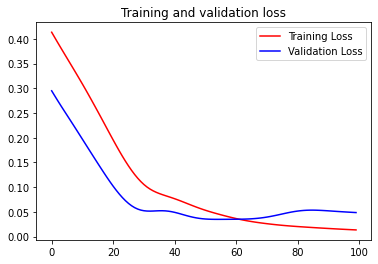

<Figure size 432x288 with 0 Axes>

In [20]:
# Grafik training dan validation loss
training_loss=fitting_history.history['loss']
validation_loss=fitting_history.history['val_loss']
epochs=range(len(training_loss))

plt.plot(epochs, training_loss, 'r', label="Training Loss")
plt.plot(epochs, validation_loss, 'b', label="Validation Loss")
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

<Figure size 432x288 with 0 Axes>

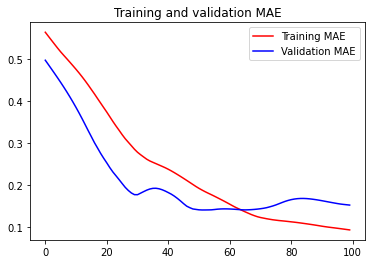

<Figure size 432x288 with 0 Axes>

In [21]:
# Grafik training and validation MAE
training_mae=fitting_history.history['mae']
validation_mae=fitting_history.history['val_mae']
epochs=range(len(training_mae))

plt.plot(epochs, training_mae, 'r', label="Training MAE")
plt.plot(epochs, validation_mae, 'b', label="Validation MAE")
plt.title('Training and validation MAE')
plt.legend(loc=0)
plt.figure()

In [22]:
# Simpan model
model.save('model-kelembaban.h5')

# **Testing Model**

In [23]:
# Load the model
model = tf.keras.models.load_model('model-kelembaban.h5')

In [24]:
#Prediksi Data
data_prediksi = model.predict(input_test)

In [25]:
print(data_prediksi)
print("-------")
print(output_test)

[[0.85572594 0.7758915  0.68142664 0.5034116 ]
 [0.7153676  0.5633874  0.42231885 0.29194003]
 [0.62821573 0.41530582 0.28609496 0.19607235]
 [0.49005678 0.24969302 0.15466088 0.13710654]
 [0.35937682 0.13319084 0.07493328 0.1573658 ]
 [0.2693798  0.10865502 0.09451224 0.27178174]]
-------
[[0.84552846 0.84444444 0.68617886 0.49701897]
 [0.84444444 0.68617886 0.49701897 0.47533875]
 [0.68617886 0.49701897 0.47533875 0.2102981 ]
 [0.49701897 0.47533875 0.2102981  0.32357724]
 [0.47533875 0.2102981  0.32357724 0.52737127]
 [0.2102981  0.32357724 0.52737127 0.97886179]]


In [26]:
# Inverse transform data min max
data_prediksi = scaler.inverse_transform(data_prediksi)
output_test = scaler.inverse_transform(output_test)

In [27]:
print(data_prediksi)
print("-------")
print(output_test)

[[82.78814  81.31519  79.57232  76.28795 ]
 [80.19854  77.3945   74.79179  72.38629 ]
 [78.59058  74.66239  72.27845  70.61754 ]
 [76.04154  71.606834 69.85349  69.52962 ]
 [73.6305   69.457375 68.38252  69.9034  ]
 [71.97006  69.004684 68.74375  72.01437 ]]
-------
[[82.6  82.58 79.66 76.17]
 [82.58 79.66 76.17 75.77]
 [79.66 76.17 75.77 70.88]
 [76.17 75.77 70.88 72.97]
 [75.77 70.88 72.97 76.73]
 [70.88 72.97 76.73 85.06]]


[82.6, 82.58000000000001, 79.66, 76.17]
[1, 2, 3, 4]
[82.78814, 81.31519, 79.57232, 76.28795]
[1, 2, 3, 4]


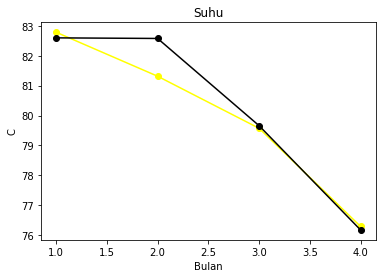

In [28]:
temp_test=[]
number=[]
count=1

for j in output_test[0]:
  temp_test.append(j)
  number.append(count)
  count+=1
  
print(temp_test)
print(number)

temp_predict=[]
number=[]
count=1

for j in data_prediksi[0]:
  temp_predict.append(j)
  number.append(count)
  count+=1
  
print(temp_predict)
print(number)

# Grafik garis dari Suhu
plt.plot(number,temp_predict,marker='o',color="yellow")
plt.plot(number,temp_test,marker='o',color="black")
plt.title('Kelembaban')
plt.ylabel('RH')
plt.xlabel('Bulan')
plt.show()

[82.58000000000001, 79.66, 76.17, 75.77000000000001]
[1, 2, 3, 4]
[80.19854, 77.3945, 74.79179, 72.38629]
[1, 2, 3, 4]


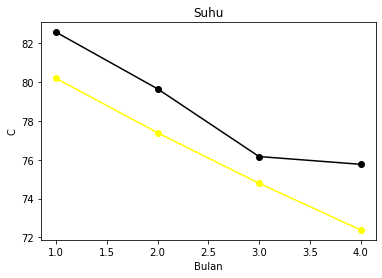

In [29]:
temp_test=[]
number=[]
count=1

for j in output_test[1]:
  temp_test.append(j)
  number.append(count)
  count+=1
  
print(temp_test)
print(number)

temp_predict=[]
number=[]
count=1

for j in data_prediksi[1]:
  temp_predict.append(j)
  number.append(count)
  count+=1
  
print(temp_predict)
print(number)

# Grafik garis dari Suhu
plt.plot(number,temp_predict,marker='o',color="yellow")
plt.plot(number,temp_test,marker='o',color="black")
plt.title('Kelembaban')
plt.ylabel('RH')
plt.xlabel('Bulan')
plt.show()

[79.66, 76.17, 75.77000000000001, 70.88]
[1, 2, 3, 4]
[78.59058, 74.66239, 72.27845, 70.61754]
[1, 2, 3, 4]


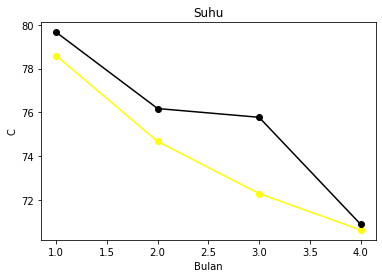

In [30]:
temp_test=[]
number=[]
count=1

for j in output_test[2]:
  temp_test.append(j)
  number.append(count)
  count+=1
  
print(temp_test)
print(number)

temp_predict=[]
number=[]
count=1

for j in data_prediksi[2]:
  temp_predict.append(j)
  number.append(count)
  count+=1
  
print(temp_predict)
print(number)

# Grafik garis dari Suhu
plt.plot(number,temp_predict,marker='o',color="yellow")
plt.plot(number,temp_test,marker='o',color="black")
plt.title('Kelembaban')
plt.ylabel('RH')
plt.xlabel('Bulan')
plt.show()

[76.17, 75.77000000000001, 70.88, 72.97]
[1, 2, 3, 4]
[76.04154, 71.606834, 69.85349, 69.52962]
[1, 2, 3, 4]


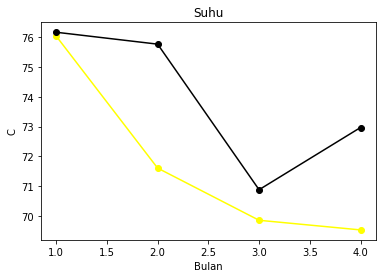

In [31]:
temp_test=[]
number=[]
count=1

for j in output_test[3]:
  temp_test.append(j)
  number.append(count)
  count+=1
  
print(temp_test)
print(number)

temp_predict=[]
number=[]
count=1

for j in data_prediksi[3]:
  temp_predict.append(j)
  number.append(count)
  count+=1
  
print(temp_predict)
print(number)

# Grafik garis dari Suhu
plt.plot(number,temp_predict,marker='o',color="yellow")
plt.plot(number,temp_test,marker='o',color="black")
plt.title('Kelembaban')
plt.ylabel('RH')
plt.xlabel('Bulan')
plt.show()

[75.77000000000001, 70.88, 72.97, 76.73]
[1, 2, 3, 4]
[73.6305, 69.457375, 68.38252, 69.9034]
[1, 2, 3, 4]


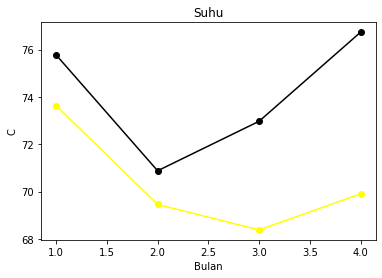

In [32]:
temp_test=[]
number=[]
count=1

for j in output_test[4]:
  temp_test.append(j)
  number.append(count)
  count+=1
  
print(temp_test)
print(number)

temp_predict=[]
number=[]
count=1

for j in data_prediksi[4]:
  temp_predict.append(j)
  number.append(count)
  count+=1
  
print(temp_predict)
print(number)

# Grafik garis dari Suhu
plt.plot(number,temp_predict,marker='o',color="yellow")
plt.plot(number,temp_test,marker='o',color="black")
plt.title('Kelembaban')
plt.ylabel('RH')
plt.xlabel('Bulan')
plt.show()

[70.88, 72.97, 76.73, 85.06]
[1, 2, 3, 4]
[71.97006, 69.004684, 68.74375, 72.01437]
[1, 2, 3, 4]


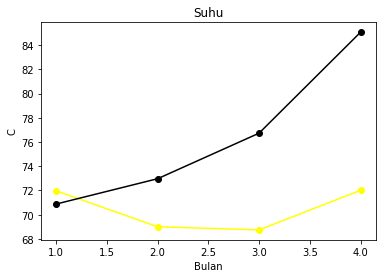

In [33]:
temp_test=[]
number=[]
count=1

for j in output_test[5]:
  temp_test.append(j)
  number.append(count)
  count+=1
  
print(temp_test)
print(number)

temp_predict=[]
number=[]
count=1

for j in data_prediksi[5]:
  temp_predict.append(j)
  number.append(count)
  count+=1
  
print(temp_predict)
print(number)

# Grafik garis dari Suhu
plt.plot(number,temp_predict,marker='o',color="yellow")
plt.plot(number,temp_test,marker='o',color="black")
plt.title('Kelembaban')
plt.ylabel('RH')
plt.xlabel('Bulan')
plt.show()